<h1><center>HY473
<br>
2nd Assignment
<br>
Athanasios Panagiotis Rentzelas
<br>
csd4734</center></h1>   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

<font size="5"><u><b>Part A:</b></u></font>

In [2]:
cases = 290000
population = 6.8*(10**9)
prior = (cases/population)
sensitivity = 0.99
specificity=0.96

<table>
<thead>
<tr>
<th></th>
<th>Disease Present</th>
<th>Disease not Present</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Positive test</b></td>
<td>True Positive(sensitivity)</td>
<td>False Positive</td>
</tr>
<tr>
<td><b>Negative Test</b></td>
<td>False Negative</td>
<td>True Negative(specificity)</td>
</tr>
<tr>
</tbody>
</table>

We want to calculate the posterior probability of a person having the disease given the prior probability,the sensitivity and the specificity of the test.<br>
For this reason we will use the <b>Bayes' Theorem</b>.<br>
The formula will be: 
$$ P(D^+|T^+) = \frac{P(T^+|D^+)P(D^+)}{P(T^+)}  .$$
Where $P(T^+|D^+)$ is the specificity of the test, $P(D^+)$ is the prior probability and $P(T^+)$ is the probability of the test being positive. <br>
$P(T^+)$ is calculated using the <b>Law of Total Probability</b> and looks like: $$P(T^+)=P(T^+|D^+)P(D^+)+P(T^+|D^-)P(D^-).$$ <br>
We already know what $P(T^+|D^+)$ and $P(D^+)$ are, $P(D^-)$ is the prior probability of not having the disease, so it is $1-Prior$ <br>
and $P(T^+|D^-)$ is the false positive which is calculate from $1-Specificity$, because specificity is $P(T^-|D^-)$.

In [3]:
def post_calc(sensitivity,specificity,prior):
    prob_test_pos = sensitivity*prior + (1-specificity)*(1-prior)
    return (sensitivity*prior)/prob_test_pos

first_post=post_calc(sensitivity,specificity,prior)
print("The posterior probability of a person having the disease, given that it tested positive is: {:.7f}".format(first_post))

The posterior probability of a person having the disease, given that it tested positive is: 0.0010544


Now the person tested positive for a second time.So now,we can calculate a new posterior probability using our function, with the prior now being the previous posterior.

In [4]:
second_post=post_calc(sensitivity,specificity,first_post)
print("The posterior probability of a person having the disease, given that it tested positive two times is: {:.7f}".format(second_post))

The posterior probability of a person having the disease, given that it tested positive two times is: 0.0254600


We see that the probability of having the disease,given that it tested positive two times, is considerably higher than testing positive one time.This makes sense, because our prior is now higher, based on previous tests on that person,

Now we want to calculate the different posterior, having different number of cases (the numbers are much bigger each time).

In [5]:
cases = np.array([2*(10**6),7.5*(10**6),10**9])
priors = cases/population
res = post_calc(sensitivity,specificity,priors)

print("The posterior probability of a person having the disease, given that it tested positive and the number of cases worldwide are 2 million is: {:.7f}".format(res[0]))
print("The posterior probability of a person having the disease, given that it tested positive and the number of cases worldwide are 7.5 million is: {:.7f}".format(res[1]))
print("The posterior probability of a person having the disease, given that it tested positive and the number of cases worldwide are 1 billion is: {:.7f}".format(res[2]))

The posterior probability of a person having the disease, given that it tested positive and the number of cases worldwide are 2 million is: 0.0072289
The posterior probability of a person having the disease, given that it tested positive and the number of cases worldwide are 7.5 million is: 0.0266010
The posterior probability of a person having the disease, given that it tested positive and the number of cases worldwide are 1 billion is: 0.8101473


We observe a big increase in the posterior probabilities as the number of cases gets really large, which is something we should expect as the number of cases is proportional to the prior probability,<br> which we use in the <b>Bayes' Theorem</b>. 

<font size="5"><u><b>Part B:</b></u></font>

<font size="3"><u><b>Question 1:</b></u></font>

The probability of two children having different birthdays is $\frac{364}{365}$ , because there are 364 available days for the second kid to have its birthday, in order to have different birthdays.

The total permutations are $23 \choose 2$, which is $\frac{23!}{2!21!}$ and it results to $253$ combinations.

The probability of all children having different birthdays,is basically the probability of 1 child having a different birthday comparing to another child, but this time to the power of the total comparissons that must be made, which is calculated as we saw in the previous question (by $m \choose 2$ where m is the total number of students in the class).

In [6]:
def prob_diff_birth_class(students):
    prob_diff_birth_2_kids = 364/365
    permutations = math.factorial(students)/(math.factorial(2)*math.factorial(students-2))
    return prob_diff_birth_2_kids**permutations
print("The probability of two students having different birthdays in a class of 23 students is {:.5f}".format(prob_diff_birth_class(23)))

The probability of two students having different birthdays in a class of 23 students is 0.49952


In order to see how many students should there be in the class in order to be mathematically certain that there are at least 2 students
with the same birthday, we will test different sizes of m (students).

(I am considering mathematically certain as a probability of $0.9999$ and above.)

In [7]:
#I defined the array with max 100 just to see if the answer would be there,because with larger numbers it got too slow,so I left it as it is knowing the answer is 83
#And also I defined it from 50 because I didn't expect, from the beginning, a probability close to 0.999 that fast,having already calculated the probability for 23 students
m = np.array(np.linspace(50,100,dtype=int))
res = np.array([1-prob_diff_birth_class(students) for students in m ])
for i in range(len(res)):
    if(res[i]>=0.9999):
        desired_m=m[i]
        break
print("The number of students in a class in order to be mathematically certain that 2 students have the same birthday is:",desired_m)

The number of students in a class in order to be mathematically certain that 2 students have the same birthday is: 83


We would expect before learning probabilities that the number of people needed to have two persons with the same birthday would be much larger than 365 which are the days of a year. But now we can understand that we care about the total comparissons between students and not specifically the number of students. As we can expect, 83 students require a large number of comparissons between them (much larger than 365), so we should expect 2 people having the same birthday given the total number of combinations of students.

<font size="3"><u><b>Question 2:</b></u></font>

a) The guesses are independent (in this example), so the probability of a single guess being left is equal to $0.5$.<br>
<font size="2">Comment: I assume that you didn't want us to calculate the probability of a guess being left _given the teacher's birthday_,which would be basically the likelihood.</font>

b) By the guesses being independent, the probability of 5 guesses in a row being left, is just $(0.5)^5$, which results to: $0.03125$

In [8]:
print(0.5**5)

0.03125


c) The probability of having 4 guesses out of 10 being left (without them being particularly in order), is represented by a _Binomial_ distribution, more specifically $Bin~(23,0.5)$ which is equal to<br>
$f(4,10,0.5)={10\choose 4}{(0.5)^4}{(0.5)^6}$

In [9]:
print("The above probability is:",(math.factorial(10)/(math.factorial(4)*math.factorial(6))*(0.5**4)*(0.5**6)))

The above probability is: 0.205078125


Having a sequence of Left and Right guesses we can use Bayesian update to calculate a posterior probability distribution for the teacher's birthday.<br>
The formula will look like this:
$${P(x|\text{Left guesses})}={\frac{{P(\text{Left guesses}|x)}{P(x)}}{P(\text{Left guesses})}}$$
We omit the evidence of the Bayes theorem, which is the term ${P(\text{Left guesses})}$,  as it will just normalize our posterior probability.
The term ${P(x|\text{Left guesses})}$ represents the posterior probability we want to calculate, ${P(\text{Left guesses}|x)}$ is the likelihood of the function, which in other words is what is the probability of having a left guess given the date of the teacher's birthday and last but not least, the term ${P(x)}$ is the prior probability of the teacher's birthday, which is what we will update each time we get a new posterior. <br>
<br>
The way to calculate the likelihood of a guess being left given a specific day, is by imagining an horizontal axis from 0 to 364 and a random _X_ where we want the birthday to be.The number of dates at the left of _X_ is _X_ - 1.So, in order to find the probability of having a guess equal to left given the date, we divide the number of dates that are at the left side by the total number of days.

In [10]:
days = np.arange(1,365)
starting_priors = np.ones(364,dtype=float)/365

def calculateLikelihood(days):
    likelihoodL=(days-1)/365
    return [likelihoodL,1-likelihoodL]
def calculate_pos(guess,prior):
        if(guess=='L'):
              return calculateLikelihood(days)[0]*prior
        else:
             return calculateLikelihood(days)[1]*prior 
        


The day with the maximum probability after calculating all the posteriors is: 206


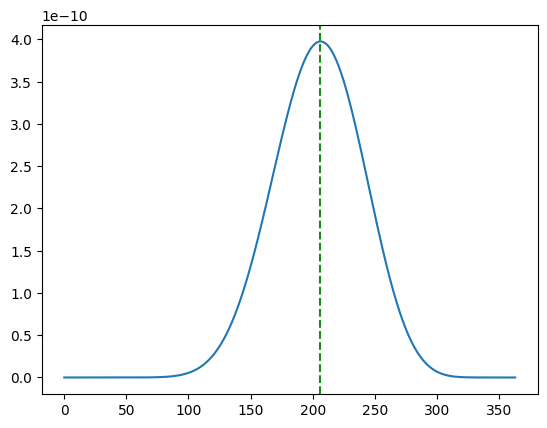

In [11]:
guesses = ['L', 'L', 'L', 'R' ,'L' ,'R', 'R', 'L', 'R', 'R' ,'R' ,'L' ,'L' ,'L', 'R' ,'L', 'L', 'R', 'R', 'R','L', 'L', 'L']
posteriors = np.zeros((len(guesses) + 1, len(days)))
posteriors[0] = starting_priors

for i in range(len(guesses)):
    priors = posteriors[i]
    posteriors[i+1] = calculate_pos(guesses[i],priors)
    
plt.plot(posteriors[len(posteriors)-1])
plt.axvline(x=np.argmax(posteriors[len(posteriors)-1]), color = 'g', linestyle = '--', alpha=0.9)
plt.show

print("The day with the maximum probability after calculating all the posteriors is:",np.argmax(posteriors[len(posteriors)-1]))

We observe a distribution simillar to a _Gaussian_ . Also, the result of the most probable day, is something reasonable, as the guesses are a little bit _Left_ biased, so we could expect a distribution that is a bit <br>" _moved_ " to the right.

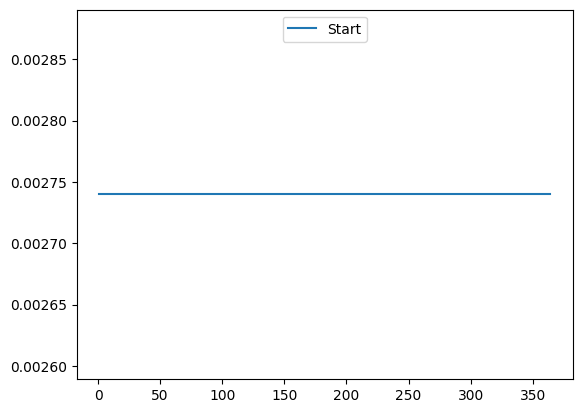

In [12]:
fig, ax = plt.subplots()
def animate(i):
    ax.clear()
    if i ==0:
        plot = ax.plot(days, posteriors[i])
        ax.legend(['Start'], loc=9)
    else:
        plot = ax.plot(days, posteriors[i])
        ax.legend([guesses[i-1]], loc=9)
        ax.axvline(x=np.argmax(posteriors[i]), color = 'g', linestyle = '--', alpha=0.9)
    return plot

anim = animation.FuncAnimation(fig, animate, len(posteriors), repeat=True, blit=False)
anim

We can see after our animated plot, how the distribution changes as we are giving more information to our model. We can see for example, how the plot is changing for the first 3 guesses, which are all _Left_ and we get the expected result that the dates closer to the end of the year will have greater probability. 

<font size="2">Comment:I studied the code that we were given in the tutorial, but I also "got inspired" by googleing.Some links I used:<br> https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation <br>
https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/ <br>
https://www.youtube.com/watch?v=Wyp1fH9txsE&t=127s&ab_channel=TheFireSafetyChannel </font>